# Sign Game Server

Game Plan:

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sign_game.ml.landmarks import Landmarks

2023-03-12 22:07:36.342945: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 22:07:38.027340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 22:07:38.027404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 22:07:38.162342: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-12 22:07:40.650072: W tensorflow/stream_executor/platform/de

In [2]:
landmark = Landmarks()

## Dataset Preprocessing

In [3]:
# Dataset
df = pd.read_csv('../raw_data/images_ds.csv')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
df.columns

Index(['Unnamed: 0', 'WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X',
       'THUMB_CMC_Y', 'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y',
       'THUMB_MCP_Z', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X',
       'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X',
       'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X',
       'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X',
       'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X',
       'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X',
       'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X',
       'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z', 'RING_FINGER

In [5]:
df = df.drop(columns=df.columns[[0, -1]], axis=1)
df.columns

Index(['WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X', 'THUMB_CMC_Y',
       'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_MCP_Z',
       'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X', 'THUMB_TIP_Y',
       'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y',
       'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y',
       'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y',
       'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y',
       'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y',
       'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y',
       'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y',
       'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y',
       'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y',
       'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y',
       'RING_FINGER_PIP_Z', 'RING_FINGER_DIP_X', 'RING

In [6]:
df.head()

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,TARGET
0,0.464909,0.708310,-5.075436e-07,0.555220,0.661323,-0.030122,0.611244,0.556989,-0.037128,0.628575,...,0.420475,0.517954,-0.068963,0.438464,0.582875,-0.067767,0.449238,0.623481,-0.053324,A
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,0.428278,0.524772,-2.572420e-07,0.484400,0.516362,-0.018880,0.532799,0.455504,-0.020887,0.545799,...,0.438880,0.360585,-0.026516,0.432223,0.408768,-0.022789,0.426714,0.444198,-0.011816,A
3,0.424784,0.526288,-2.787659e-07,0.482184,0.515636,-0.018121,0.529932,0.453517,-0.020017,0.542437,...,0.436482,0.355436,-0.025730,0.430714,0.406064,-0.021307,0.425438,0.442749,-0.009893,A
4,0.417284,0.526785,-2.808050e-07,0.475789,0.512959,-0.018400,0.523456,0.451368,-0.021122,0.536454,...,0.430234,0.355039,-0.027363,0.425070,0.405152,-0.022343,0.419382,0.441459,-0.010160,A


In [7]:
df = df.dropna()

In [8]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled

array([[ 0.61172893,  1.30016343,  1.56086182, ...,  1.02262409,
         1.81515065, -0.48085822],
       [-1.91861011,  0.77894682,  0.68003182, ..., -1.78087429,
         1.69471225,  0.04907075],
       [-0.44910848,  1.02983294, -0.71119009, ...,  2.33416338,
         0.10532126,  0.7007881 ],
       ...,
       [-1.75163259,  0.55314278, -0.58926822, ..., -1.80331275,
         1.05752899,  0.62293567],
       [ 0.84490902,  0.65802339,  0.54387071, ...,  1.09439257,
        -0.88193892, -0.31802448],
       [-1.26425777, -1.72321391, -0.55663988, ..., -1.31674368,
        -0.95509247,  0.86587828]])

In [12]:
y.value_counts()

B    587
A    544
E    518
F    464
C    425
D    416
H    408
O    400
I    391
W    387
L    387
V    376
G    369
K    359
Y    353
X    346
R    344
U    338
S    333
T    333
N    331
Q    289
P    273
M    266
J     70
Z     70
Name: TARGET, dtype: int64

In [13]:
lab = LabelEncoder()
y_train_encoded = lab.fit_transform(y_train)
y_train_encoded

array([21, 20, 14, ..., 13,  1, 19])

In [14]:
y_train_dic = dict(zip(y_train_encoded, y_train))
y_train_dic

{21: 'V',
 20: 'U',
 14: 'O',
 11: 'L',
 4: 'E',
 12: 'M',
 13: 'N',
 10: 'K',
 8: 'I',
 0: 'A',
 24: 'Y',
 1: 'B',
 23: 'X',
 2: 'C',
 5: 'F',
 22: 'W',
 15: 'P',
 6: 'G',
 3: 'D',
 19: 'T',
 7: 'H',
 16: 'Q',
 17: 'R',
 18: 'S',
 9: 'J',
 25: 'Z'}

In [15]:
X_train_scaled.shape, y_train_encoded.shape, X_test_scaled.shape, y_test.shape

((7501, 63), (7501,), (1876, 63), (1876,))

## KNN Model

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train_encoded)

KNeighborsClassifier(n_neighbors=1)

## Predict

In [17]:
y_preds = knn.predict(X_test_scaled)
y_preds

array([ 4, 10, 10, ..., 14,  4, 12])

In [18]:
letter_preds = [y_train_dic[y_pred] for y_pred in y_preds]
letter_preds

['E',
 'K',
 'K',
 'T',
 'Q',
 'W',
 'A',
 'F',
 'U',
 'S',
 'A',
 'W',
 'S',
 'G',
 'A',
 'G',
 'M',
 'C',
 'L',
 'T',
 'X',
 'D',
 'E',
 'I',
 'B',
 'L',
 'V',
 'W',
 'A',
 'W',
 'B',
 'T',
 'J',
 'A',
 'M',
 'I',
 'N',
 'N',
 'P',
 'E',
 'C',
 'I',
 'X',
 'T',
 'Q',
 'X',
 'F',
 'N',
 'A',
 'L',
 'B',
 'V',
 'A',
 'S',
 'K',
 'N',
 'D',
 'F',
 'N',
 'M',
 'D',
 'R',
 'X',
 'H',
 'A',
 'S',
 'G',
 'R',
 'U',
 'D',
 'L',
 'I',
 'B',
 'B',
 'A',
 'A',
 'N',
 'B',
 'E',
 'O',
 'H',
 'A',
 'C',
 'X',
 'D',
 'X',
 'T',
 'W',
 'E',
 'Y',
 'P',
 'R',
 'B',
 'A',
 'C',
 'Q',
 'V',
 'W',
 'B',
 'Q',
 'T',
 'S',
 'F',
 'G',
 'I',
 'L',
 'O',
 'B',
 'F',
 'O',
 'L',
 'B',
 'E',
 'S',
 'E',
 'W',
 'H',
 'R',
 'O',
 'K',
 'A',
 'D',
 'L',
 'Q',
 'W',
 'Q',
 'B',
 'B',
 'B',
 'S',
 'B',
 'W',
 'F',
 'E',
 'W',
 'S',
 'D',
 'I',
 'O',
 'O',
 'T',
 'E',
 'Y',
 'U',
 'A',
 'P',
 'A',
 'G',
 'N',
 'K',
 'D',
 'H',
 'D',
 'B',
 'L',
 'R',
 'X',
 'A',
 'L',
 'D',
 'D',
 'Q',
 'T',
 'K',
 'L',
 'T',
 'A'

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

def evaluate_matrix(y_true, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.close(1) # don't display pre-sized matrix
    fig, ax = plt.subplots(figsize=(12, 12))
    disp.plot(ax=ax)
    print(classification_report(y_true, y_pred))
    plt.show()

In [20]:
def evaluate_model(y_test, y_pred):
#     # Preditions on holdout test dataset
#     y_pred = model.predict(X_test)
#     y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=range(26), columns=range(26))
    plt.figure(figsize=(10, 8))
    plt.title('Model Confusion Matrix')
    plt.xlabel('Predicted Letter')
    plt.ylabel('True Letter')
    plt.xticks(range(26), labels=range(26))
    plt.yticks(range(26), labels=range(26))
    plt.imshow(cm_df, cmap='Blues')
    plt.colorbar()
    plt.show()
    
    # Calculate classification report
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print('Accuracy:', accuracy)

              precision    recall  f1-score   support

           A       0.95      0.93      0.94       114
           B       0.95      0.96      0.95       112
           C       0.93      0.94      0.93        79
           D       0.91      0.92      0.92        88
           E       0.77      0.85      0.81        96
           F       0.96      0.92      0.94        89
           G       0.97      0.93      0.95        80
           H       0.99      0.99      0.99        68
           I       0.97      0.97      0.97        89
           J       0.94      1.00      0.97        15
           K       0.92      0.92      0.92        74
           L       0.97      0.96      0.97        79
           M       0.85      0.96      0.90        47
           N       0.91      0.87      0.89        70
           O       0.90      0.96      0.93        73
           P       0.96      0.98      0.97        54
           Q       0.98      0.96      0.97        68
           R       0.85    

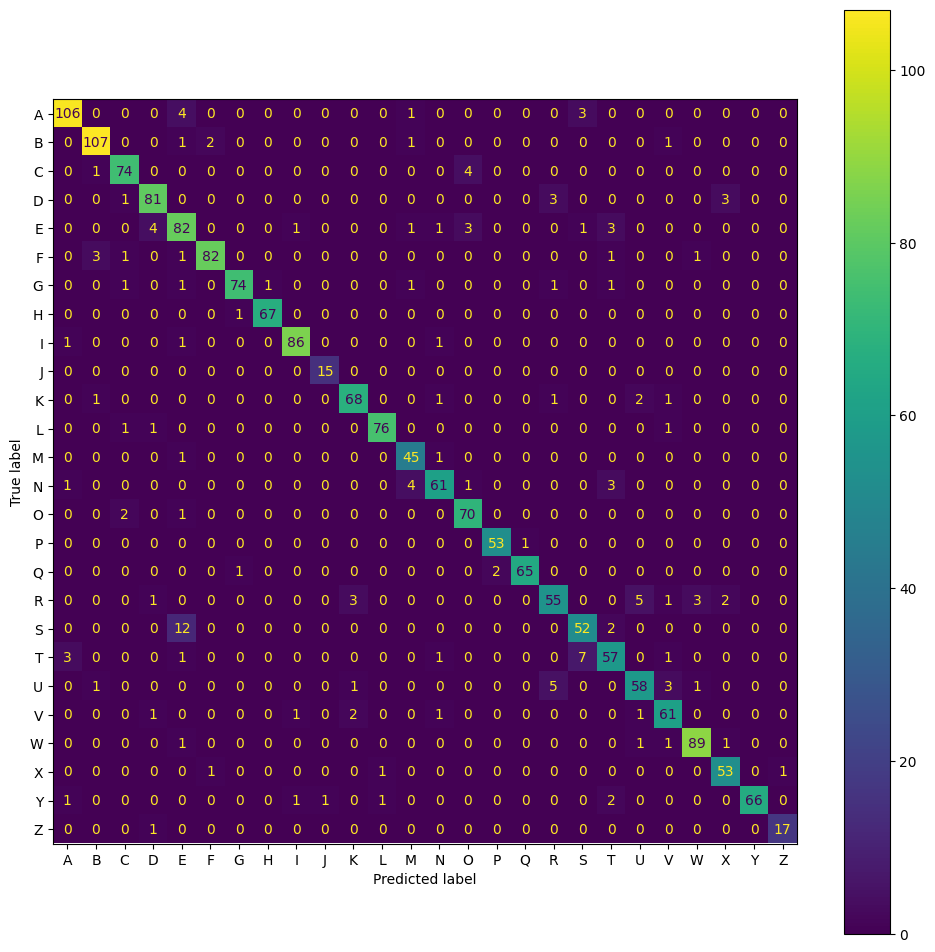

In [21]:
evaluate_matrix(y_test, letter_preds)

In [22]:
# evaluate_model(letter_preds, y_test)

In [23]:
from sklearn.model_selection import GridSearchCV

params={'n_neighbors': [num for num in range(1, 15)]}
search_accuracy = GridSearchCV(KNeighborsClassifier(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
search_accuracy.fit(X_train_scaled, y_train_encoded)
search_accuracy.best_params_

{'n_neighbors': 1}

In [24]:
params={'n_neighbors': [num for num in range(1, 15)]}
search2_accuracy = GridSearchCV(KNeighborsClassifier(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
search2_accuracy.fit(X_train, y_train_encoded)
search2_accuracy.best_params_

{'n_neighbors': 1}

In [25]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train_encoded)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_preds2 = knn2.predict(X_test)
y_preds2

array([ 4, 10, 10, ..., 14,  4, 12])

In [27]:
letter_preds2 = [y_train_dic[y_pred2] for y_pred2 in y_preds2]
letter_preds2

['E',
 'K',
 'K',
 'T',
 'P',
 'W',
 'A',
 'F',
 'U',
 'S',
 'A',
 'W',
 'S',
 'G',
 'A',
 'G',
 'M',
 'C',
 'L',
 'T',
 'X',
 'D',
 'E',
 'I',
 'B',
 'L',
 'V',
 'W',
 'A',
 'W',
 'B',
 'T',
 'J',
 'A',
 'M',
 'I',
 'N',
 'N',
 'P',
 'E',
 'C',
 'I',
 'X',
 'T',
 'Q',
 'X',
 'F',
 'N',
 'S',
 'L',
 'B',
 'V',
 'A',
 'S',
 'K',
 'N',
 'D',
 'F',
 'Y',
 'N',
 'D',
 'R',
 'X',
 'H',
 'A',
 'S',
 'G',
 'R',
 'U',
 'D',
 'L',
 'I',
 'B',
 'B',
 'A',
 'A',
 'N',
 'B',
 'E',
 'O',
 'H',
 'A',
 'C',
 'X',
 'D',
 'X',
 'T',
 'W',
 'E',
 'Y',
 'P',
 'R',
 'B',
 'A',
 'C',
 'Q',
 'V',
 'W',
 'B',
 'Q',
 'T',
 'S',
 'F',
 'G',
 'I',
 'L',
 'O',
 'B',
 'F',
 'O',
 'L',
 'B',
 'E',
 'S',
 'E',
 'W',
 'H',
 'R',
 'O',
 'K',
 'A',
 'D',
 'L',
 'Q',
 'W',
 'Q',
 'B',
 'B',
 'B',
 'S',
 'B',
 'W',
 'F',
 'E',
 'W',
 'S',
 'D',
 'I',
 'O',
 'O',
 'T',
 'E',
 'Y',
 'U',
 'A',
 'P',
 'A',
 'G',
 'N',
 'K',
 'D',
 'H',
 'D',
 'B',
 'E',
 'R',
 'X',
 'A',
 'L',
 'D',
 'D',
 'Q',
 'T',
 'K',
 'L',
 'T',
 'A'

              precision    recall  f1-score   support

           A       0.94      0.95      0.94       114
           B       0.93      0.98      0.96       112
           C       0.96      0.99      0.97        79
           D       0.93      0.95      0.94        88
           E       0.80      0.88      0.84        96
           F       0.99      0.93      0.96        89
           G       0.97      0.95      0.96        80
           H       0.99      0.99      0.99        68
           I       0.98      0.96      0.97        89
           J       0.94      1.00      0.97        15
           K       0.91      0.92      0.91        74
           L       1.00      0.97      0.99        79
           M       0.90      0.96      0.93        47
           N       0.94      0.89      0.91        70
           O       0.92      0.96      0.94        73
           P       1.00      1.00      1.00        54
           Q       1.00      0.99      0.99        68
           R       0.84    

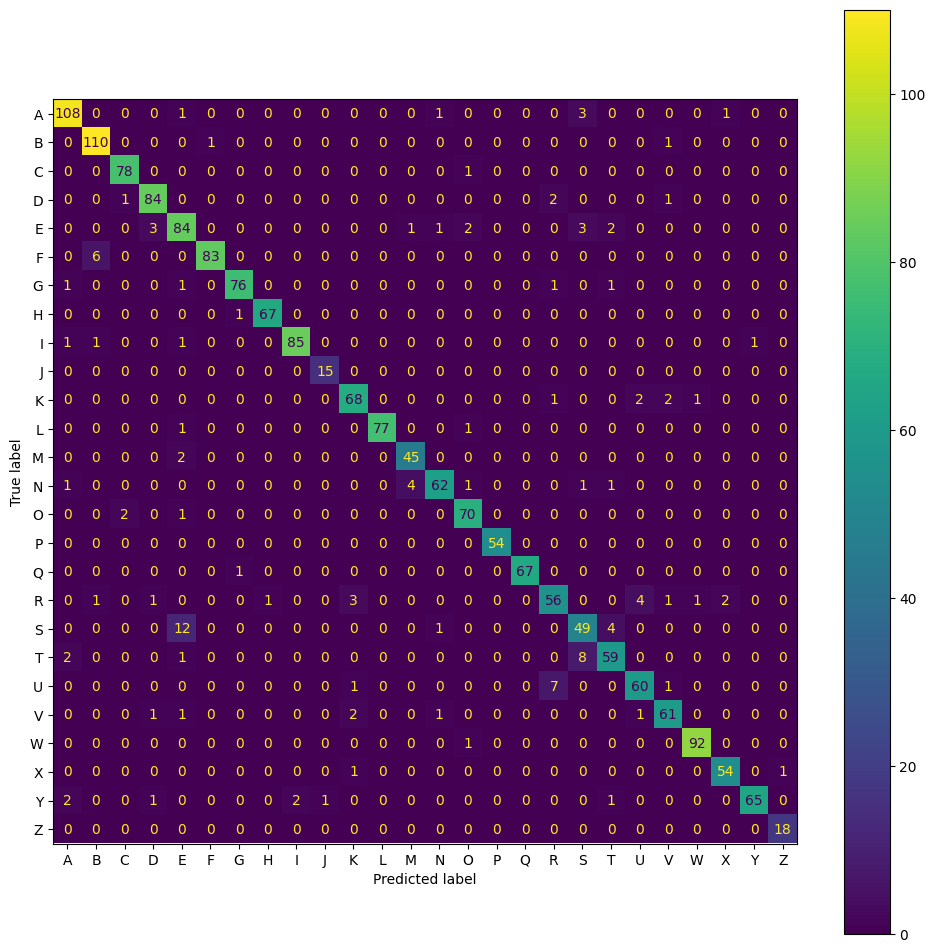

In [28]:
evaluate_matrix(y_test, letter_preds2)

In [29]:
# evaluate_model(letter_preds2, y_test)

In [47]:
import cv2
name = 'S - camera.jpg'
image=cv2.imread(f'../images/{name}')

In [48]:
landmarks=Landmarks()
cv2_img_w_landmarks, landmark_object = landmarks.image_to_landmark_np(image, draw_landmarks=True)

In [49]:
s=landmark_object.flatten()
s=np.reshape(s, (1, 63))
s_scaled=scaler.transform(s)

/home/wendyto/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
y_train_dic[knn.predict(s_scaled)[0]]

'T'

In [51]:
y_train_dic[knn2.predict(s)[0]]

/home/wendyto/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'T'

In [60]:
knn.predict(s_scaled)

array([19])

In [67]:
t_name = 't.jpg'
t_image=cv2.imread(f'../images/{t_name}')

Image: S - camera.jpg:


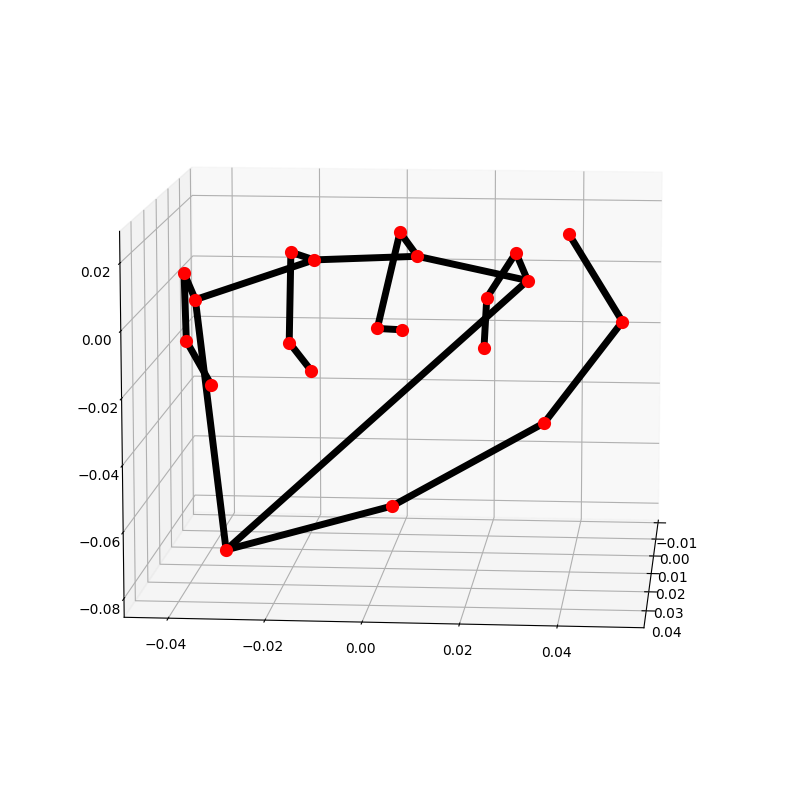

Image: t.jpg:


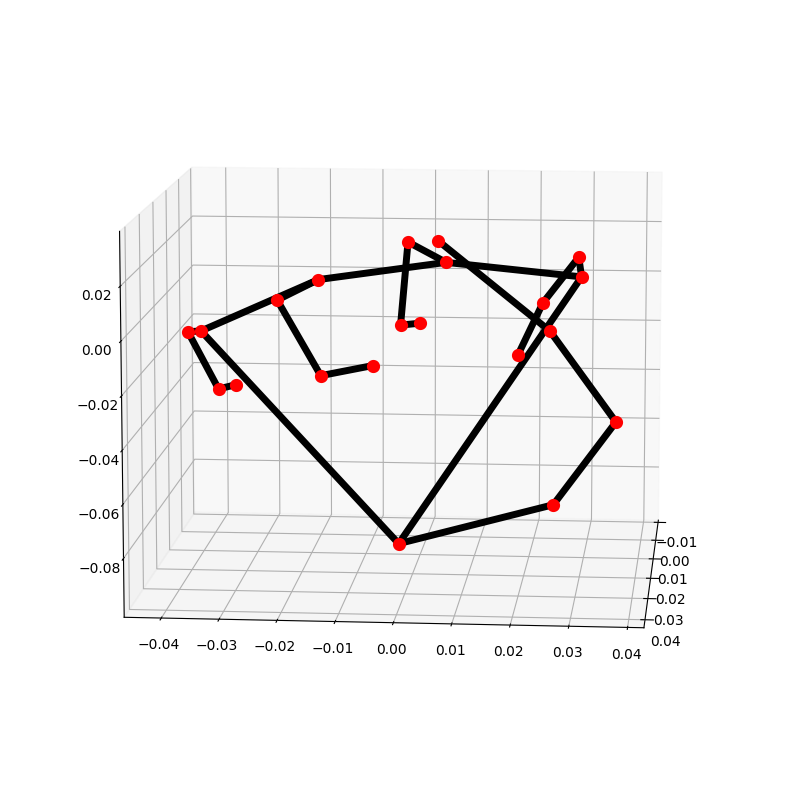

In [79]:
import mediapipe as mp
mp_hands = mp.solutions.hands

hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)


results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
results2 = hands.process(cv2.cvtColor(t_image, cv2.COLOR_BGR2RGB))

print(f'Image: {name}:')
for hand_world_landmarks in results.multi_hand_world_landmarks:
  mp_drawing.plot_landmarks(
    hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
print(f'Image: {t_name}:')
for hand_world_landmarks2 in results2.multi_hand_world_landmarks:
  mp_drawing.plot_landmarks(
    hand_world_landmarks2, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [ ]:
image2=cv2.imread('../images/U - camera.jpg')

In [ ]:
cv2_img_w_landmarks2, landmark_object2 = landmarks.image_to_landmark_np(image2, draw_landmarks=True)

In [ ]:
u=np.reshape(landmark_object2.flatten(), (1,63))
print(y_train_dic[knn.predict(scaler.transform(u))[0]])
print(y_train_dic[knn2.predict(u)[0]])

In [ ]:
df3 = pd.read_csv('../raw_data/asl_dataset/train.csv')
df3.head()

In [ ]:
df3 = df3.drop(columns=df3.columns[[0, -1]], axis=1)
df3.head()

In [ ]:
df3 = df3.dropna()
df3.info()

In [ ]:
X3_train = df3.drop(columns=['TARGET'])
y3_train = df3['TARGET']

In [ ]:
df3_test = pd.read_csv('../raw_data/asl_dataset/test.csv')
df3_test

In [ ]:
df3_test = df3_test.drop(columns=df3_test.columns[[0, -1]], axis=1)
df3_test = df3_test.dropna()
df3_test.info()

In [ ]:
X3_test = df3_test.drop(columns=['TARGET'])
y3_test = df3_test['TARGET']

In [ ]:
lab3 = LabelEncoder()
y3_train_encoded = lab3.fit_transform(y3_train)
y3_train_encoded

In [ ]:
y3_dic=dict(zip(y3_train_encoded, y3_train))

In [ ]:
# params={'n_neighbors': [num for num in range(1, 15)]}
# search3_accuracy = GridSearchCV(KNeighborsClassifier(),
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5)
# search3_accuracy.fit(X3_train, y3_train_encoded)
# search3_accuracy.best_params_

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=1)
knn3.fit(X3_train, y3_train_encoded)

In [ ]:
y3_preds = knn3.predict(X3_test)
y3_preds

In [ ]:
letter_preds3 = [y3_dic[y3_pred] for y3_pred in y3_preds]
letter_preds3

In [ ]:
evaluate_matrix(y3_test, letter_preds3)

In [ ]:
# evaluate_model(letter_preds3, y3_test)

In [ ]:
print(y3_dic[knn3.predict(u)[0]])
print(y3_dic[knn3.predict(s)[0]])

In [ ]:
from sign_game.ml.landmarks_utils import normalize_handmarks_per_image

In [ ]:
df3_norm=normalize_handmarks_per_image(df3)

In [ ]:
X3_train_norm = df3_norm.drop(columns=['TARGET'])
y3_train_norm = df3_norm['TARGET']

In [ ]:
# params={'n_neighbors': [num for num in range(1, 15)]}
# search4_accuracy = GridSearchCV(KNeighborsClassifier(),
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5)
# search4_accuracy.fit(X3_train_norm, y3_train_encoded)
# search4_accuracy.best_params_

In [ ]:
knn4=KNeighborsClassifier(n_neighbors=1)
knn4.fit(X3_train_norm, y3_train_encoded)

In [ ]:
df3_test_norm=normalize_handmarks_per_image(df3_test)

In [ ]:
X3_test_norm = df3_test_norm.drop(columns=['TARGET'])

In [ ]:
%%time
y4_preds = knn4.predict(X3_test_norm)
y4_preds

In [ ]:
letter_preds4 = [y3_dic[y4_pred] for y4_pred in y4_preds]
letter_preds4

In [ ]:
evaluate_matrix(y3_test, letter_preds4)

In [ ]:
evaluate_model(letter_preds4, y3_test)

In [ ]:
print(y3_dic[knn4.predict(u)[0]])
print(y3_dic[knn4.predict(s)[0]])

In [ ]:
knn4.save()